**Experiment 4**


A random forest model that aim to predict NP3TOT to compare with previous experiment with an important clinicxal score NHY which is suspected to drive prediction or leak data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("final_df_cleaned.csv")

In [ ]:
df.head()

,PATNO,SEX,AGE,Brain_Stem,Right_choroid_plexus,Right_Cerebellum_White_Matter,Left_Cerebellum_Cortex,Left_choroid_plexus,Left_Pallidum,Left_Thalamus,...,Putamen_Total,Caudate_Total,Putamen_Asym,Caudate_Asym,CortexVol_norm,TotalGrayVol_norm,Hippocampus_Total_norm,Amygdala_Total_norm,Caudate_Total_norm,Putamen_Total_norm
0,3000.0,0.0,69.1,20725.6,537.7,11125.5,54840.0,747.9,1765.6,6955.3,...,5.57,6.42,-0.055655,0.068536,0.276552,0.380586,0.005046,0.001680,0.003801,0.005288
1,3001.0,1.0,65.1,23802.3,633.1,16515.1,59127.2,716.5,2268.1,7746.8,...,1.45,3.92,-0.103448,-0.020408,0.268779,0.378124,0.005145,0.002145,0.006034,0.007797
2,3002.0,0.0,67.6,19271.1,592.4,11807.5,52148.3,495.2,1913.5,6805.1,...,2.79,6.64,0.275986,0.120482,0.299985,0.419209,0.005184,0.002046,0.005387,0.007759
3,3003.0,0.0,56.6,22191.0,623.8,15223.8,56613.4,682.2,2092.5,7451.9,...,1.79,6.17,-0.240223,-0.176661,0.277726,0.388823,0.005995,0.002064,0.004245,0.006880
4,3004.0,1.0,59.3,24473.0,420.0,14517.1,50758.6,358.6,1393.8,8138.2,...,6.51,10.39,-0.087558,0.020212,0.284486,0.382852,0.005141,0.002137,0.003922,0.006585


In [ ]:
# Drop irrelevant columns
drop_cols = ['PATNO','EVENT_ID_y']

df = df.drop(columns=drop_cols)

print("After dropping irrelevant columns:")
print(df.shape)
print(df.columns)

After dropping irrelevant columns:
(1716, 107)
Index(['SEX', 'AGE', 'Brain_Stem', 'Right_choroid_plexus',
       'Right_Cerebellum_White_Matter', 'Left_Cerebellum_Cortex',
       'Left_choroid_plexus', 'Left_Pallidum', 'Left_Thalamus',
       'Right_VentralDC',
       ...
       'Putamen_Total', 'Caudate_Total', 'Putamen_Asym', 'Caudate_Asym',
       'CortexVol_norm', 'TotalGrayVol_norm', 'Hippocampus_Total_norm',
       'Amygdala_Total_norm', 'Caudate_Total_norm', 'Putamen_Total_norm'],
      dtype='object', length=107)


In [ ]:
y = df['NP3TOT']

In [ ]:
selected_features = ['AGE', 'Left_choroid_plexus', 'Left_Accumbens_area',
       'lhCerebralWhiteMatterVol', 'CSF', 'lh_entorhinal', 'lh_middletemporal',
       'lh_temporalpole', 'lh_insula', 'rh_bankssts', 'rh_entorhinal',
       'rh_lateraloccipital', 'rh_parahippocampal', 'rh_parsorbitalis',
       'rh_pericalcarine', 'rh_rostralanteriorcingulate',
       'rh_rostralmiddlefrontal', 'rh_insula', 'Putamen_Total',
       'Caudate_Total', 'Putamen_Asym', 'Caudate_Asym', 'TotalGrayVol_norm',
       'Hippocampus_Total_norm', 'Putamen_Total_norm','NHY']

In [ ]:
X_selected = df[selected_features]

In [ ]:
import numpy as np

# 1. Striatal-Entorhinal Network Interaction
X_selected['Putamen_Entorhinal_Ratio'] = X_selected['Putamen_Total'] / (X_selected['lh_entorhinal'] + 1e-6)

# 2. Asymmetry-Weighted Striatal Score
X_selected['Asym_Striatal_Score'] = X_selected['Putamen_Total'] * (1 + abs(X_selected['Putamen_Asym']))

# 3. White Matter Integrity Index
X_selected['WM_Integrity'] = X_selected['lhCerebralWhiteMatterVol'] / X_selected['TotalGrayVol_norm']

# 4. Age-Adjusted Striatal Binding (Nonlinear)
X_selected['Age_Adjusted_Putamen'] = X_selected['Putamen_Total'] / (X_selected['AGE'] ** 0.33)

# 5. Ventricular Effect Score (if CSF represents ventricular volume)
X_selected['Ventricular_Effect'] = X_selected['CSF'] * X_selected['AGE']

/tmp/ipython-input-11-3726815268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Putamen_Entorhinal_Ratio'] = X_selected['Putamen_Total'] / (X_selected['lh_entorhinal'] + 1e-6)
/tmp/ipython-input-11-3726815268.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Asym_Striatal_Score'] = X_selected['Putamen_Total'] * (1 + abs(X_selected['Putamen_Asym']))
/tmp/ipython-input-11-3726815268.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
col_drop = ["TotalGrayVol_norm",'WM_Integrity','Ventricular_Effect']

X_selected.drop(columns=col_drop)

,AGE,Left_choroid_plexus,Left_Accumbens_area,lhCerebralWhiteMatterVol,CSF,lh_entorhinal,lh_middletemporal,lh_temporalpole,lh_insula,rh_bankssts,...,Putamen_Total,Caudate_Total,Putamen_Asym,Caudate_Asym,Hippocampus_Total_norm,Putamen_Total_norm,NHY,Putamen_Entorhinal_Ratio,Asym_Striatal_Score,Age_Adjusted_Putamen
0,69.1,747.9,160.4,248312.0,1039.0,2.805,2.271,2.954,2.751,2.752,...,5.57,6.42,-0.055655,0.068536,0.005046,0.005288,0.0,1.985739,5.88,1.376662
1,65.1,716.5,333.4,279750.0,1481.8,3.539,2.719,3.715,2.989,2.391,...,1.45,3.92,-0.103448,-0.020408,0.005145,0.007797,1.0,0.409720,1.60,0.365499
2,67.6,495.2,363.0,213644.0,835.3,3.771,2.976,4.115,3.072,2.690,...,2.79,6.64,0.275986,0.120482,0.005184,0.007759,2.0,0.739857,3.56,0.694579
3,56.6,682.2,331.3,252510.0,1235.7,3.922,2.660,3.820,2.954,2.684,...,1.79,6.17,-0.240223,-0.176661,0.005995,0.006880,2.0,0.456400,2.22,0.472524
4,59.3,358.6,396.3,268029.0,851.9,3.494,2.682,3.114,2.860,2.756,...,6.51,10.39,-0.087558,0.020212,0.005141,0.006585,0.0,1.863194,7.08,1.692283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,69.4,511.4,261.0,219408.0,1031.2,3.292,2.872,3.898,2.975,2.557,...,1.85,4.40,-0.016216,-0.004545,0.008317,0.007882,0.0,0.561968,1.88,0.456587
1712,71.0,1298.2,208.5,240200.0,1186.7,3.149,2.719,3.252,2.955,2.409,...,1.85,4.40,-0.016216,-0.004545,0.004440,0.004944,0.0,0.587488,1.88,0.453165
1713,69.2,1024.3,373.9,225452.0,1257.5,3.671,2.872,3.650,3.114,2.400,...,1.70,3.49,-0.070588,-0.002865,0.005749,0.005910,1.0,0.463089,1.82,0.419966
1714,60.4,772.3,595.0,271750.0,1765.8,2.827,2.799,3.721,3.283,2.493,...,1.85,4.40,-0.016216,-0.004545,0.005300,0.005439,0.0,0.654404,1.88,0.478002


In [ ]:
from sklearn.model_selection import train_test_split

# y should be your target vector (UPDRS scores)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,
    y,
    test_size=0.2,
    random_state=42,
    stratify=pd.qcut(y, q=3)  # Stratify by UPDRS severity
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define random distributions instead of exhaustive lists
param_dist = {
    'n_estimators': [100, 300],  # reduced range
    'max_depth': [7, 9, None],
    'min_samples_split': [2, 5],
    'max_features': [0.6, 'sqrt']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# RandomizedSearchCV: fewer iterations, faster runtime
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # only try 10 combinations (vs 24 in GridSearchCV)
    cv=3,  # use 3-fold CV instead of 5
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

In [ ]:
best_rf

RandomForestRegressor(max_depth=7, max_features=0.6, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = best_rf.predict(X_test)

# Calculate all metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print comprehensive results
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

MAE: 4.634
MSE: 43.206
RMSE: 6.573
R²: 0.680


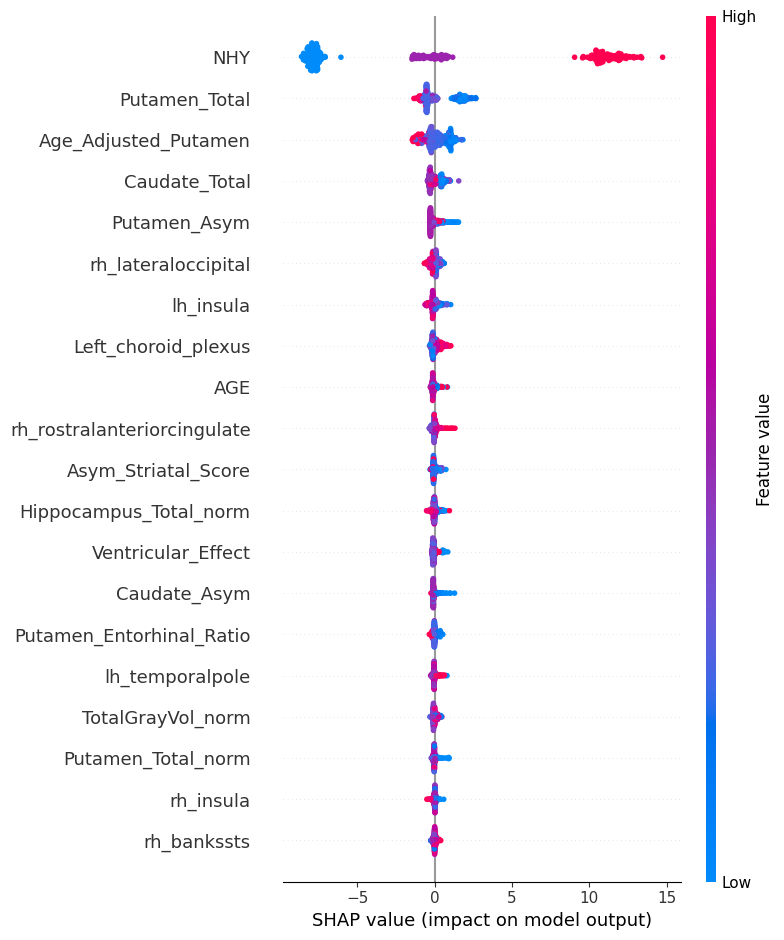

In [ ]:
import shap
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test)

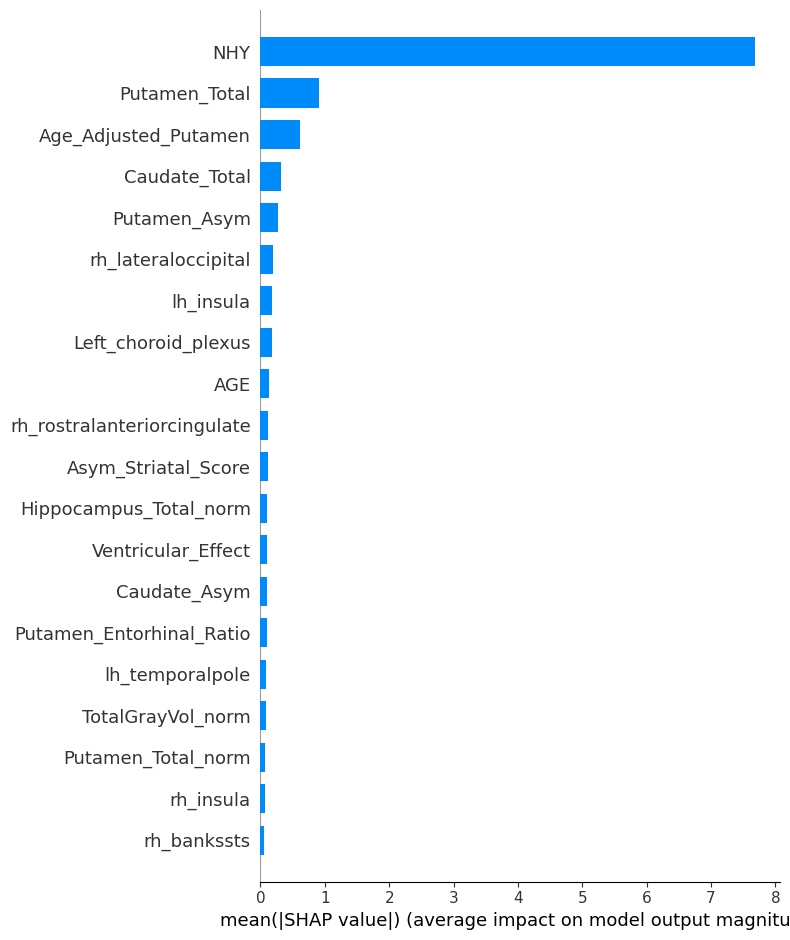

In [ ]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Experiment Results Comparison

Comparing the results of the two experiments:

| Metric | Experiment without NHY | Experiment with NHY |
|---|---|---|
| MAE | 5.654 | 4.634 |
| MSE | 55.653 | 43.206 |
| RMSE | 7.460 | 6.573 |
| R² | 0.588 | 0.680 |

As observed, including the NHY scores in the feature set significantly improved the model's performance across all metrics. The Mean Absolute Error (MAE) decreased from 5.654 to 4.634, indicating a smaller average prediction error. The R-squared (R²) value increased from 0.588 to 0.680, suggesting that a larger proportion of the variance in the target variable (UPDRS scores) is explained by the model when NHY is included.

The SHAP analysis also revealed that NHY is a dominant feature, influencing the contribution of other features. This indicates the strong predictive power of the NHY score for UPDRS in this dataset.